In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [296]:
pd.set_option('display.max_columns', None) # displays all columns in dfs

#import warnings
#warnings.filterwarnings('ignore') # no more warnings 

In [297]:
data1 = pd.read_csv('files_for_lab\csv_files\marketing_customer_analysis.csv')

# 1. Show the dataframe shape.

In [298]:
data1.shape

(9134, 24)

In [299]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [300]:
display(data1)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# 2. Standardize header names.

In [301]:
#Lets delete the duplicate column if it is there
try:
    data1 = data1.drop(['Unnamed: 0'], axis = 1)
except KeyError:
    pass

In [302]:
data1.columns = data1.columns.str.lower()

In [303]:
data1.columns = data1.columns.str.replace(' ','_')
    

# 3. Which columns are numerical?

In [304]:
data1_column_numerical = data1.select_dtypes(include=['int','float'])

In [305]:
data1_column_numerical.columns.tolist()

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount']

# 4. Which columns are categorical?

In [306]:
data1_column_categorial = data1.select_dtypes(include=['object'])

In [307]:
data1_column_categorial.columns.tolist()

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

# 5. Check and deal with NaN values.

In [308]:
data1_column_numerical.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [309]:
data1_column_categorial.isna().sum()

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

In [310]:
#data1.months_since_last_claim.value_counts()

In [311]:
#data1.number_of_open_complaints.value_counts()

In [312]:
#data1.number_of_open_complaints.describe()

In [313]:
#data1.months_since_last_claim.describe()

Replacing numerical NaNs with median

In [314]:
data1.number_of_open_complaints = data1.number_of_open_complaints.fillna(0)

In [315]:
data1.months_since_last_claim = data1.months_since_last_claim.fillna(14)

Checking what other values are in the categorial NaN columns

In [316]:
#data1.months_since_last_claim.fillna().value_counts()

In [317]:
#data1.state.value_counts()

In [318]:
#data1.response.value_counts()

In [319]:
#data1.vehicle_class.value_counts()

In [320]:
#data1.vehicle_size.value_counts()

In [321]:
#data1.vehicle_type.value_counts()

In [322]:
#data1[data1.isna().any(axis=1)]

In [323]:
#data1.dropna(axis='columns')

Replacing categorial NaNs with 'unknown' for now

In [324]:
#data1.vehicle_type = data1.vehicle_type.fillna('unknown')
#data1.vehicle_class = data1.vehicle_class.fillna('unknown')
#data1.vehicle_size = data1.vehicle_size.fillna('unknown')
#data1.state = data1.state.fillna('unknown')
#data1.response = data1.response.fillna('unknown')
#data1

#data1[data1.isna().any(axis=1)]

# 6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March

In [325]:
#data1['effective_to_date']

In [326]:
#This checks all the columns for 'object' datatype
for col in data1.columns:
    if data1[col].dtype == 'object':
        #create a new column 'month', use to_datetime to convert the date and use DatetimeIndex().month to only get the month
        try:
            data1['month'] = pd.DatetimeIndex(pd.to_datetime(data1[col])).month
        except ValueError:
            pass

Data already seems to be sorted by January and February

# 7. BONUS: Put all the previously mentioned data transformations into a function.

In [327]:
#Lets delete the duplicate column if it is there
try:
    data1 = data1.drop(['Unnamed: 0'], axis = 1)
except KeyError:
    pass

def eda(df):
    print('shape: ', df.shape)
        
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ','_')    
    print('column names have been standardized')
    
    print('numerical columns: ' , df.select_dtypes(include=['int','float']).columns.to_list())
    
    print('categorial columns: ', df.select_dtypes(include=['object']).columns.to_list())    
    
    #First choose what we want to filter for, numerical or categorial.
    numerics = ['int16', 'int32', 'int64','float64']
    #Create the dataframe with the chosen(numerical in this case) filter.
    df_num = data1.select_dtypes(include=numerics)
    #Create a subset of the chosen filter with columns that have NaN values.
    subset_df_num = df_num.loc[:, data1.isnull().any()]
    #For numerical filter we fill the NaNs with that columns median.
    subset_df_num = subset_df_num.fillna(subset_df_num.median())
    #Update original dataframe with filled NaN values
    data1.update(subset_df_num)
    print('Numerical NaN values have been filled with the columns median')
    
    #for col in data1.columns:
    #if data1[col].dtype == 'float64':
    #    try:
    #        data1[col] = data1[col].fillna(data1[col].median())
    #    except ValueError:
    #        pass
    
    #Similar to numerical filter
    categories = ['object']
    df_cat = data1.select_dtypes(include=categories)
    subset_df_cat = df_cat.loc[:, data1.isnull().any()]
    #Here we fill the NaNs with a new string 'unknown'
    subset_df_cat = subset_df_cat.fillna('unknown')
    data1.update(subset_df_cat)
    print('Categorial NaN values have been filled with \'unknown\' string')
    
    #This checks all the columns for object datatype
    for col in data1.columns:
        if data1[col].dtype == 'object':
            #create a new column 'month', use to_datetime to convert the date and use DatetimeIndex().month to only get the month
            try:
                data1['month'] = pd.DatetimeIndex(pd.to_datetime(data1[col])).month
            except ValueError:
                pass
            
    #data1['month_of_the_year'] = pd.to_datetime(data1['effective_to_date'])
    #data1['month_of_the_year'] = pd.DatetimeIndex(pd.to_datetime(data1['effective_to_date'])).month

In [328]:
eda(data1)
display(data1)

shape:  (9134, 25)
column names have been standardized
numerical columns:  ['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount', 'month']
categorial columns:  ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']
Numerical NaN values have been filled with the columns median
Categorial NaN values have been filled with 'unknown' string


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


# Lab | Customer Analysis Round 3

1. Show DataFrame info.

In [329]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

2. Describe DataFrame.

In [330]:
display(data1.describe(include=['object']))
display(data1.describe())

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


3. Show a plot of the total number of responses.

<AxesSubplot:>

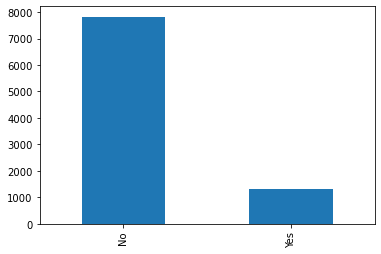

In [331]:
data1['response'].value_counts().plot(kind='bar')

4. Show a plot of the response rate by the sales channel.

C:\Users\nicol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sales_channel', ylabel='count'>

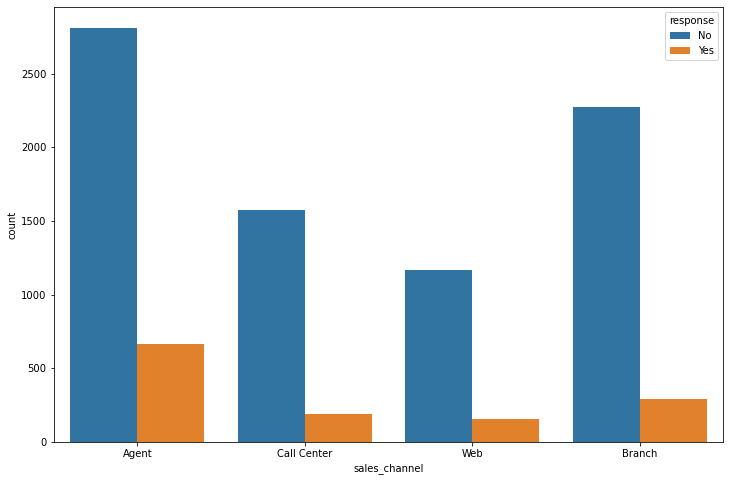

In [332]:
plt.figure(figsize=(12,8))
sns.countplot('sales_channel', hue='response', data=data1)

In [333]:
#plt.figure(figsize=(8,10))
#sns.barplot(x='response', y="total_claim_amount", hue='response', data=data1)
#plt.show()

In [334]:
#plt.figure(figsize=(4,6))
#plt.scatter(data1.response, data1.total_claim_amount)

5. Show a plot of the response rate by the total claim amount.


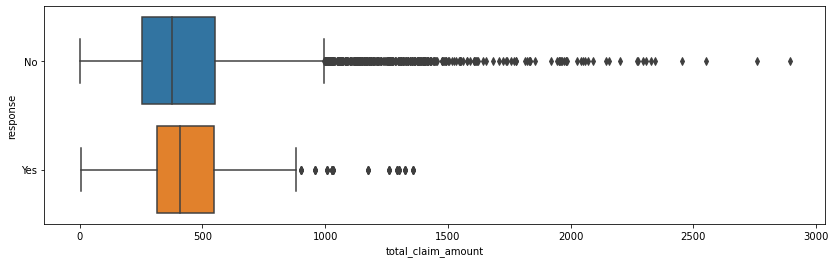

In [335]:
plt.figure(figsize=(14,4))
sns.boxplot(y='response', x='total_claim_amount', data=data1)
plt.show()

6. Show a plot of the response rate by income.

<AxesSubplot:xlabel='income', ylabel='response'>

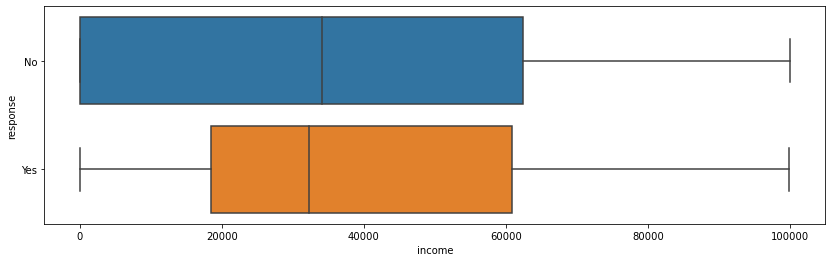

In [342]:
plt.figure(figsize=(14,4))
sns.boxplot(y = 'response', x = 'income', data = data1)